In [630]:
# ! pip install matplotlib==3.1.1
# !pip uninstall matplotlib

https://towardsdatascience.com/unsupervised-anomaly-detection-on-time-series-9bcee10ab473

In [631]:
# ! pip install plotly
# !pip install xlrd

In [632]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# # import altair as alt
# from IPython.display import HTML
# import math
# import time
# from datetime import datetime
# from sklearn.ensemble import IsolationForest
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from sklearn.preprocessing import MinMaxScaler
# import plotly.graph_objs as go
# import matplotlib.pyplot as plt
# from matplotlib import pyplot

In [633]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import altair as alt
from IPython.display import HTML
import math
import time
from datetime import datetime
from sklearn.ensemble import IsolationForest
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
# import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [634]:
# !pip install fbprophet



# !pip install pyod
# !pip install --upgrade pyod  # or update if needed
# !pip install --pre pyod      # or include pre-release version for new features

# Forecasting Based Approaches - Prophet / ARIMA / LSTM

In [635]:
data = pd.read_excel('awscguv2.xlsx')
data.head()

,inicio,fim,mês,servico,detalhe,qnt,unidade,conta
0,2020-08-01,2020-08-02,ago,AWS CloudTrail,APN1-FreeEventsRecorded,4.430000e+12,Events,cgu-principal
1,2020-08-01,2020-08-02,ago,AWS CloudTrail,APN1-InsightsEvents,1.300000e+11,Events,cgu-principal
2,2020-08-01,2020-08-02,ago,AWS CloudTrail,APN2-FreeEventsRecorded,4.440000e+12,Events,cgu-principal
3,2020-08-01,2020-08-02,ago,AWS CloudTrail,APN2-InsightsEvents,1.300000e+11,Events,cgu-principal
4,2020-08-01,2020-08-02,ago,AWS CloudTrail,APS1-FreeEventsRecorded,4.420000e+12,Events,cgu-principal


In [636]:
data.dtypes

inicio     datetime64[ns]
fim        datetime64[ns]
mês                object
servico            object
detalhe            object
qnt               float64
unidade            object
conta              object
dtype: object

In [637]:
data =  data.sort_values(by="inicio")

In [638]:
data

,inicio,fim,mês,servico,detalhe,qnt,unidade,conta
21846,2020-02-01,2020-02-02,fev,EC2 - Other,SAE1-NatGateway-Hours,9.600000e+01,Hrs,cgu-principal
24043,2020-02-01,2020-02-02,fev,Tax,USE1-APIRequest,0.000000e+00,Requests,cgu-principal
21847,2020-02-01,2020-02-02,fev,Tax,SAE1-NatGateway-Hours,0.000000e+00,Hrs,cgu-principal
22288,2020-02-01,2020-02-02,fev,Amazon Simple Storage Service,SAE1-TimedStorage-ByteHrs,4.368300e-06,GB-Month,cgu-principal
19613,2020-02-01,2020-02-02,fev,Amazon Virtual Private Cloud,SAE1-DataTransfer-In-Bytes,4.754690e-05,GB,cgu-principal
...,...,...,...,...,...,...,...,...
7071,2020-08-31,2020-09-01,ago,Amazon Simple Storage Service,SAE1-AFS1-AWS-In-Bytes,3.922270e-05,GB,cgu-principal
7070,2020-08-31,2020-09-01,ago,Amazon Simple Storage Service,Requests-Tier2,1.131000e+13,Requests,cgu-principal
7069,2020-08-31,2020-09-01,ago,Amazon Simple Storage Service,Requests-Tier1,2.150000e+12,Requests,cgu-principal
7098,2020-08-31,2020-09-01,ago,Amazon Simple Storage Service,SAE1-MES1-AWS-In-Bytes,1.598630e-05,GB,cgu-principal


In [639]:
# FLAT COM ANOMALIAS FÁCEIS
# servico='Amazon Simple Storage Service'
# detalhe='USE1-SAE1-AWS-Out-Bytes'

# # CRESCENTE E COM OUTLIERS (A PARTIR MAIO)
# servico='Amazon Elastic Compute Cloud - Compute'
# detalhe='SAE1-BoxUsage:t3.medium'


# POUCOS DADOS MAS OUTLIERS (AGO)
# servico='Amazon CloudFront'
# detalhe='SA-Requests-Tier1'


# FLAT COM ANOMALIAS FÁCEIS
# servico='Amazon Virtual Private Cloud'
# detalhe='SAE1-DataTransfer-In-Bytes'


# TOP! BEM VARIADO E TODO PERÍODO
servico='Amazon Virtual Private Cloud'
detalhe='SAE1-USW2-AWS-In-Bytes'

# servico='Amazon Simple Storage Service'
# detalhe='SAE1-TimedStorage-ByteHrs'

# servico='AWS Config'
# detalhe='APN1-ConfigurationItemRecorded'

In [640]:
# data_prophet = data[data['conta']=='cgu-principal']
# data_prophet = data_prophet[data_prophet['servico']==servico]
# data_prophet = data_prophet[data_prophet['detalhe']==detalhe]
# data_prophet= data_prophet.drop(columns=['fim','mês','servico','detalhe','unidade','conta'])

data = data[data['conta']=='cgu-principal']
data = data[data['servico']==servico]
data = data[data['detalhe']==detalhe]
data= data.drop(columns=['fim','mês','servico','detalhe','unidade','conta'])

In [641]:
data = data.reset_index(drop=True)
data

,inicio,qnt
0,2020-02-01,7.820000e-08
1,2020-02-02,5.220000e-08
2,2020-02-03,1.267000e-07
3,2020-02-04,5.220000e-08
4,2020-02-05,5.220000e-08
...,...,...
199,2020-08-27,7.830000e-08
200,2020-08-28,7.830000e-08
201,2020-08-29,5.220000e-08
202,2020-08-30,5.220000e-08


In [642]:
scaler = MinMaxScaler()

In [643]:
scaler.fit(np.array(data['qnt']).reshape(-1,1))

MinMaxScaler()

In [644]:
# data = scaler.transform(np.array(data['qnt']).reshape(-1,1))
data['qnt'] = scaler.transform(np.array(data['qnt']).reshape(-1,1))

In [645]:
print(data.min(),data.max())

inicio    2020-02-01 00:00:00
qnt                         0
dtype: object inicio    2020-08-31 00:00:00
qnt                         1
dtype: object


In [646]:
data

,inicio,qnt
0,2020-02-01,0.411208
1,2020-02-02,0.205998
2,2020-02-03,0.794002
3,2020-02-04,0.205998
4,2020-02-05,0.205998
...,...,...
199,2020-08-27,0.411997
200,2020-08-28,0.411997
201,2020-08-29,0.205998
202,2020-08-30,0.205998


In [647]:
data_sarima = data.copy()
data_sarima

,inicio,qnt
0,2020-02-01,0.411208
1,2020-02-02,0.205998
2,2020-02-03,0.794002
3,2020-02-04,0.205998
4,2020-02-05,0.205998
...,...,...
199,2020-08-27,0.411997
200,2020-08-28,0.411997
201,2020-08-29,0.205998
202,2020-08-30,0.205998


In [648]:
data_sarima.dtypes

inicio    datetime64[ns]
qnt              float64
dtype: object

In [649]:
df = data.rename(columns={"inicio": "load_date", "qnt": "actuals"})
df

,load_date,actuals
0,2020-02-01,0.411208
1,2020-02-02,0.205998
2,2020-02-03,0.794002
3,2020-02-04,0.205998
4,2020-02-05,0.205998
...,...,...
199,2020-08-27,0.411997
200,2020-08-28,0.411997
201,2020-08-29,0.205998
202,2020-08-30,0.205998


In [650]:
actual_vals = df.actuals.values
actual_log = np.log10(actual_vals)

C:\ProgramData\Anaconda3\envs\Novo_AD\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log10



# REDE NEURAL

In [651]:
# !pip install keras

In [652]:
df['actuals']

0      0.411208
1      0.205998
2      0.794002
3      0.205998
4      0.205998
         ...   
199    0.411997
200    0.411997
201    0.205998
202    0.205998
203    0.205998
Name: actuals, Length: 204, dtype: float64

In [653]:
scaler.fit(np.array(df['actuals']).reshape(-1,1))

MinMaxScaler()

In [654]:
scaled_train = scaler.transform(np.array(df['actuals']).reshape(-1,1))

In [655]:
len(scaled_train)

204

In [656]:
print(scaled_train.min(),scaled_train.max())

0.0 1.0


(array([25.,  0., 97.,  0., 34., 19., 13.,  9.,  5.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

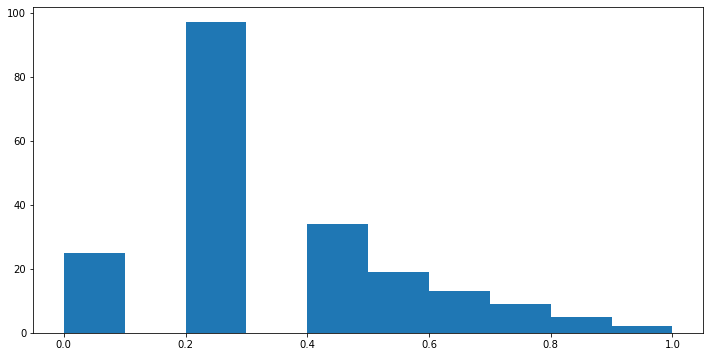

In [657]:
plt.hist(scaled_train)

In [658]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [659]:
n_input = 7 #tamanho de cada lote
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [660]:
len(generator)

197

In [661]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [662]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [663]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [664]:
model.fit_generator(generator,epochs=100)

Epoch 1/100
197/197 [==============================] - 1s 7ms/step - loss: 0.0579
Epoch 2/100
197/197 [==============================] - 1s 4ms/step - loss: 0.0487
Epoch 3/100
197/197 [==============================] - 1s 4ms/step - loss: 0.0484
Epoch 4/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0465
Epoch 5/100
197/197 [==============================] - 1s 4ms/step - loss: 0.0474
Epoch 6/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0447
Epoch 7/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0444
Epoch 8/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0452
Epoch 9/100
197/197 [==============================] - 1s 4ms/step - loss: 0.0432
Epoch 10/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0464
Epoch 11/100
197/197 [==============================] - 1s 4ms/step - loss: 0.0410
Epoch 12/100
197/197 [==============================] - 1s 5ms/step - loss: 0.0420
Epoch 13/100


197/197 [==============================] - 1s 3ms/step - loss: 0.0274
Epoch 100/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0268


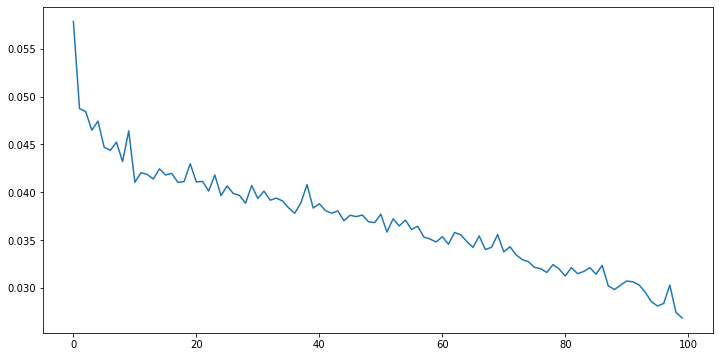

In [665]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [666]:
first_eval_batch = scaled_train[-7:]

In [667]:
test_predictions = []
teste = 30


first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(teste):
    
    # obter a previsão de tempo 1 antecipadamente ([0] é para pegar apenas o número em vez de [array])
    current_pred = model.predict(current_batch)[0]
    
    # predição
    test_predictions.append(current_pred) 
    
    # atualize a rodada para agora incluir a previsão e descartar o primeiro valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [668]:
# plt.rcParams['figure.figsize'] = [12,6]
# plt.plot(df['actuals'],linewidth=5, label = 'Teste')
# plt.plot(model.predict(scaled_train), label = 'Rede Dinâmica')
# plt.legend()

In [669]:
len(generator)

197

In [670]:
train_predictions = model.predict(generator)
len(train_predictions)

197

In [671]:
test_predictions

[array([0.20138632], dtype=float32),
 array([0.27681524], dtype=float32),
 array([0.3252224], dtype=float32),
 array([0.3837003], dtype=float32),
 array([0.20869768], dtype=float32),
 array([0.18806826], dtype=float32),
 array([0.19159827], dtype=float32),
 array([0.23874861], dtype=float32),
 array([0.2963282], dtype=float32),
 array([0.29658777], dtype=float32),
 array([0.35157567], dtype=float32),
 array([0.2082485], dtype=float32),
 array([0.19919689], dtype=float32),
 array([0.19229099], dtype=float32),
 array([0.21675067], dtype=float32),
 array([0.2635759], dtype=float32),
 array([0.29072985], dtype=float32),
 array([0.33949375], dtype=float32),
 array([0.22488122], dtype=float32),
 array([0.20073394], dtype=float32),
 array([0.19349079], dtype=float32),
 array([0.20710619], dtype=float32),
 array([0.2521544], dtype=float32),
 array([0.28448987], dtype=float32),
 array([0.32708892], dtype=float32),
 array([0.2258544], dtype=float32),
 array([0.21054912], dtype=float32),
 array([

In [672]:
scaled_train[0]

array([0.41120758])

In [673]:
len(scaled_train)

204

In [674]:
len(train_predictions)

197

In [675]:
train_predictions.shape

(197, 1)

In [676]:
train_predictions

array([[ 0.150449  ],
       [ 0.42704538],
       [ 0.81633073],
       [ 0.26103312],
       [ 0.10627412],
       [ 0.02461189],
       [ 0.17910121],
       [ 0.17877656],
       [ 0.26410002],
       [ 0.7771402 ],
       [ 0.30243972],
       [ 0.18492256],
       [ 0.12131757],
       [ 0.3967467 ],
       [ 0.42270523],
       [ 0.41470116],
       [ 0.45669943],
       [ 0.29944927],
       [ 0.32757556],
       [ 0.30336428],
       [ 0.21487114],
       [ 0.18221271],
       [ 0.40975046],
       [ 0.30693465],
       [ 0.1346086 ],
       [ 0.05892621],
       [ 0.18672208],
       [ 0.40621853],
       [ 0.48194352],
       [ 0.42130762],
       [ 0.21368237],
       [ 0.2780248 ],
       [ 0.41178122],
       [ 0.27904126],
       [ 0.19805819],
       [ 0.10040814],
       [ 0.16023615],
       [ 0.17393176],
       [ 0.46160835],
       [ 0.41799444],
       [ 0.44145435],
       [ 0.23532614],
       [ 0.24937227],
       [ 0.3056536 ],
       [ 0.38930184],
       [ 0

In [677]:
scaled_train[:7].mean()

0.3486300597587101

In [678]:
fill = np.full((7,1), scaled_train[:7].mean())
fill

array([[0.34863006],
       [0.34863006],
       [0.34863006],
       [0.34863006],
       [0.34863006],
       [0.34863006],
       [0.34863006]])

In [679]:
fill.shape

(7, 1)

In [680]:
train_predictions.dtype

dtype('float32')

In [681]:
# train_predictions= np.concatenate(np.array(fill),np.array(train_predictions))

In [682]:
train_predictions = np.concatenate((fill,train_predictions))

In [683]:
train_predictions.shape

(204, 1)

In [684]:
df['diff'] = scaled_train - train_predictions
df['predicted'] = train_predictions


In [685]:
df

,load_date,actuals,diff,predicted
0,2020-02-01,0.411208,0.062578,0.348630
1,2020-02-02,0.205998,-0.142632,0.348630
2,2020-02-03,0.794002,0.445372,0.348630
3,2020-02-04,0.205998,-0.142632,0.348630
4,2020-02-05,0.205998,-0.142632,0.348630
...,...,...,...,...
199,2020-08-27,0.411997,-0.032480,0.444476
200,2020-08-28,0.411997,0.003747,0.408250
201,2020-08-29,0.205998,-0.067382,0.273381
202,2020-08-30,0.205998,-0.062061,0.268060


In [686]:
outliers_cima = df[df['diff']>0.1]
outliers_cima

,load_date,actuals,diff,predicted
2,2020-02-03,0.794002,0.445372,0.348630
9,2020-02-10,0.999211,0.182880,0.816331
22,2020-02-24,0.588003,0.173302,0.414701
26,2020-02-28,0.411208,0.107843,0.303364
27,2020-02-29,0.411208,0.196336,0.214871
29,2020-03-02,0.588003,0.178253,0.409750
30,2020-03-03,0.411208,0.104273,0.306935
39,2020-03-12,0.617995,0.206214,0.411781
40,2020-03-13,0.617995,0.338954,0.279041
42,2020-03-15,0.205998,0.105590,0.100408


In [687]:
df[df['diff']<-0.1]

,load_date,actuals,diff,predicted
1,2020-02-02,0.205998,-0.142632,0.348630
3,2020-02-04,0.205998,-0.142632,0.348630
4,2020-02-05,0.205998,-0.142632,0.348630
5,2020-02-06,0.205998,-0.142632,0.348630
8,2020-02-09,0.000000,-0.427045,0.427045
19,2020-02-21,0.000000,-0.121318,0.121318
23,2020-02-25,0.000000,-0.456699,0.456699
28,2020-03-01,0.000000,-0.182213,0.182213
31,2020-03-04,0.000000,-0.134609,0.134609
37,2020-03-10,0.000000,-0.213682,0.213682


In [688]:
df2 = df.copy()

In [689]:
df2 = df2.set_index(df2['load_date'], drop=True)

In [708]:
df2

,load_date,actuals,diff,predicted
load_date,,,,
2020-02-01,2020-02-01,0.411208,0.062578,0.348630
2020-02-02,2020-02-02,0.205998,-0.142632,0.348630
2020-02-03,2020-02-03,0.794002,0.445372,0.348630
2020-02-04,2020-02-04,0.205998,-0.142632,0.348630
2020-02-05,2020-02-05,0.205998,-0.142632,0.348630
...,...,...,...,...
2020-08-27,2020-08-27,0.411997,-0.032480,0.444476
2020-08-28,2020-08-28,0.411997,0.003747,0.408250
2020-08-29,2020-08-29,0.205998,-0.067382,0.273381


In [725]:
limite= df2['diff'].quantile(q=0.98)
limite

0.3876412867234277

In [726]:
outliers_cima = df2[df2['diff']>limite]
outliers_cima

,load_date,actuals,diff,predicted
load_date,,,,
2020-02-03,2020-02-03,0.794002,0.445372,0.348630
2020-03-19,2020-03-19,0.823994,0.405999,0.417994
2020-04-03,2020-04-03,0.823994,0.388467,0.435527
2020-04-29,2020-04-29,1.000000,0.570623,0.429377
2020-06-16,2020-06-16,0.794791,0.406803,0.387988


In [727]:
outliers_baixo = df2[df2['diff']<-limite]
outliers_baixo

,load_date,actuals,diff,predicted
load_date,,,,
2020-02-09,2020-02-09,0.0,-0.427045,0.427045
2020-02-25,2020-02-25,0.0,-0.456699,0.456699
2020-07-08,2020-07-08,0.0,-0.392777,0.392777


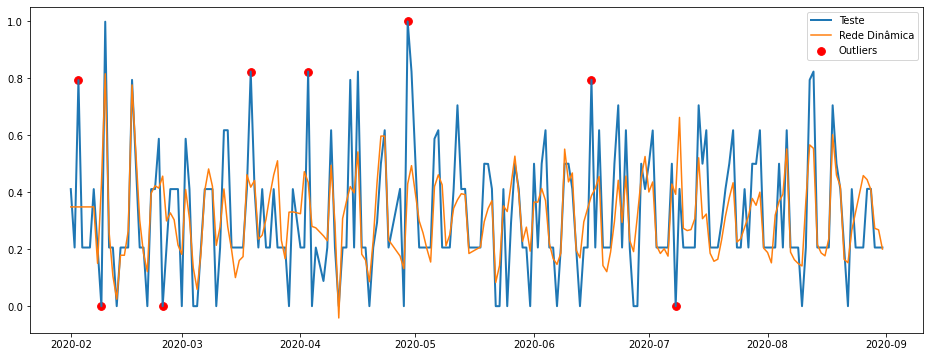

In [729]:
plt.rcParams['figure.figsize'] = [16,6]
plt.plot(df2['actuals'],linewidth=2, label = 'Teste')
plt.plot(df2['predicted'], label = 'Rede Dinâmica')
plt.scatter(outliers_cima['actuals'].index,outliers_cima['actuals'],c='red',s=60,marker='o', label = 'Outliers')
plt.scatter(outliers_baixo['actuals'].index,outliers_baixo['actuals'],c='red',s=60,marker='o')
plt.legend()
